## (1) Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("california_housing_train.csv")
test_df = pd.read_csv("california_housing_test.csv")

In [3]:
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


## (2) Tasks

### (A) Data preprocessing

#### Checking Null Values

In [5]:
## checking null values in train dataset
train_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [6]:
## checking null values in test dataset
test_df.isnull().sum()

## thus we dont have to deal with any null or missing values

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

#### Dividing the datasets into x_train, x_test, y_train, y_test

In [7]:
x_train = np.array(train_df.iloc[:, :-1])
y_train = np.array(train_df.iloc[:, -1]).reshape(-1,1)

In [8]:
x_train

array([[-114.31  ,   34.19  ,   15.    , ..., 1015.    ,  472.    ,
           1.4936],
       [-114.47  ,   34.4   ,   19.    , ..., 1129.    ,  463.    ,
           1.82  ],
       [-114.56  ,   33.69  ,   17.    , ...,  333.    ,  117.    ,
           1.6509],
       ...,
       [-124.3   ,   41.84  ,   17.    , ..., 1244.    ,  456.    ,
           3.0313],
       [-124.3   ,   41.8   ,   19.    , ..., 1298.    ,  478.    ,
           1.9797],
       [-124.35  ,   40.54  ,   52.    , ...,  806.    ,  270.    ,
           3.0147]])

In [9]:
y_train

array([[ 66900.],
       [ 80100.],
       [ 85700.],
       ...,
       [103600.],
       [ 85800.],
       [ 94600.]])

In [10]:
x_test = np.array(test_df.iloc[:, :-1])
y_test = np.array(test_df.iloc[:, -1]).reshape(-1, 1)

In [11]:
x_test

array([[-122.05  ,   37.37  ,   27.    , ..., 1537.    ,  606.    ,
           6.6085],
       [-118.3   ,   34.26  ,   43.    , ...,  809.    ,  277.    ,
           3.599 ],
       [-117.81  ,   33.78  ,   27.    , ..., 1484.    ,  495.    ,
           5.7934],
       ...,
       [-119.7   ,   36.3   ,   10.    , ...,  693.    ,  220.    ,
           2.2895],
       [-117.12  ,   34.1   ,   40.    , ...,   46.    ,   14.    ,
           3.2708],
       [-119.63  ,   34.42  ,   42.    , ...,  753.    ,  260.    ,
           8.5608]])

In [12]:
y_test

array([[344700.],
       [176500.],
       [270500.],
       ...,
       [ 62000.],
       [162500.],
       [500001.]])

#### Implementing Standardization from scratch

#### We have a mathematical formula for standardization
#### Z-Score = (Current_value - Mean) / Standard Deviation.

In [13]:
def Standardization(array): ## for the dependent variables
    rows, cols = array.shape  
    res = np.zeros((rows, cols))
    for col in range(cols):
        feature = array[:, col]  
        feature = (feature - np.mean(feature)) / np.std(feature)
        res[:, col] = feature   
    return res

In [14]:
## Standardization on the features

scaled_x_test = Standardization(x_test)
scaled_x_train = Standardization(x_train)

In [15]:
scaled_x_train

array([[ 2.619365  , -0.67152023, -1.07967114, ..., -0.36118401,
        -0.07599796, -1.25254316],
       [ 2.53956878, -0.57326437, -0.76187201, ..., -0.26186523,
        -0.09940441, -1.08148298],
       [ 2.4946834 , -0.90546278, -0.92077158, ..., -0.95535424,
        -0.99925206, -1.17010515],
       ...,
       [-2.36291168,  2.90780067, -0.92077158, ..., -0.16167524,
        -0.11760942, -0.44666313],
       [-2.36291168,  2.88908527, -0.76187201, ..., -0.1146295 ,
        -0.06039367, -0.99778717],
       [-2.387848  ,  2.29955006,  1.85997083, ..., -0.54326844,
        -0.60134255, -0.45536288]])

In [16]:
scaled_x_test

array([[-1.23372874,  0.81463305, -0.14699983, ...,  0.13024561,
         0.31773437,  1.51074547],
       [ 0.64634391, -0.64593087,  1.12756514, ..., -0.57629585,
        -0.58274291, -0.11232419],
       [ 0.89200673, -0.87135553, -0.14699983, ...,  0.07880784,
         0.01392592,  1.0711495 ],
       ...,
       [-0.05554988,  0.31212392, -1.5012251 , ..., -0.68887663,
        -0.73875265, -0.81855768],
       [ 1.2379401 , -0.72107242,  0.88858421, ..., -1.31680565,
        -1.30257733, -0.2893275 ],
       [-0.02045519, -0.57078932,  1.04790483, ..., -0.63064519,
        -0.62927213,  2.56365089]])

### (B) Implementing Normal Equation

In [17]:
class NormalEquation:
    def __init__(self):
        pass

    def fit(self, x_train, y_train):
        modified_x_train = np.c_[np.ones((x_train.shape[0], 1)), x_train] ## adding a column of ones (adding the intercept)
        transposed_modified_x_train = np.transpose(modified_x_train)
        theta = np.linalg.inv((transposed_modified_x_train @ modified_x_train)) @ (transposed_modified_x_train @ y_train)
        self.theta = theta

    def predict(self, x_test):
        modified_x_test = np.c_[np.ones((x_test.shape[0], 1)), x_test]
        return modified_x_test@(self.theta)

In [18]:
model_normal_equation = NormalEquation()
model_normal_equation.fit(x_train=scaled_x_train, y_train=y_train)

In [19]:
y_pred_normal_equation = model_normal_equation.predict(x_test=scaled_x_test)
y_pred_normal_equation

array([[358460.00878369],
       [216569.51471133],
       [276384.95549539],
       ...,
       [ 90664.64488211],
       [151950.61857716],
       [466849.37460678]])

### (C) Implementing Batch Gradient Descent

In [20]:
class GradientDescent:
    def __init__(self):
        pass

    def fit(self, x_train, y_train, epochs = 1000, learning_rate = 0.01):
        rows, cols = x_train.shape
        modified_x_train = np.c_[np.ones((rows, 1)), x_train] ## adding a column of ones (adding the intercept)
        modified_x_test = np.c_[np.ones((x_test.shape[0], 1)), x_test] 
        transpose_modified_x_train = np.transpose(modified_x_train)
        theta = np.zeros((cols+1, 1))

        loss_per_iterations = [] ## for plotting loss against iterations
        weights = [] ## needed to plot the gradient descent curve
        val_loss = [] ## needed to plot the validation loss

        for i in range(epochs):
            y_pred_before = modified_x_train@theta
            theta-=learning_rate*(transpose_modified_x_train@(y_pred_before - y_train))/rows

            y_pred_after = modified_x_train@theta
            loss_per_iterations.append(np.mean(((y_pred_after - y_train) ** 2)))
            weights.append(theta[5][0])
            val_loss.append(np.mean(((modified_x_test@theta) - y_test)**2))

        self.loss_per_iterations = loss_per_iterations
        self.theta = theta
        self.weights = weights
        self.val_loss = val_loss
        
    def predict(self, x_test):
        modified_x_test = np.c_[np.ones((x_test.shape[0], 1)), x_test]
        return modified_x_test@(self.theta)

In [21]:
model_gradient_descent = GradientDescent()
model_gradient_descent.fit(x_train=scaled_x_train, y_train=y_train)

In [22]:
y_pred_gradient_descent = model_gradient_descent.predict(scaled_x_test)
y_pred_gradient_descent

array([[344737.26708361],
       [221052.68780685],
       [286959.15684752],
       ...,
       [ 90895.26259309],
       [175317.53018716],
       [454215.5264196 ]])

### (D) Using Scikit-Learn

In [23]:
## The comparision of metrics across the three implementations (normal equation, gradient descent, sklearn) is done at the last markdown.

In [24]:
from sklearn.linear_model import LinearRegression
model_scikit_learn = LinearRegression()
model_scikit_learn.fit(scaled_x_train, y_train)

LinearRegression()

In [25]:
y_pred_scikit_learn = model_scikit_learn.predict(scaled_x_test)
y_pred_scikit_learn

array([[358460.00878369],
       [216569.51471133],
       [276384.95549539],
       ...,
       [ 90664.64488211],
       [151950.61857716],
       [466849.37460678]])

### (E) Visualizations

##### Plotting MSE against iteration number

In [26]:
curves = []
epochs = 500

## Unscaled
for lr in [1e-7, 1e-8, 1e-9]:
    gd = GradientDescent()
    gd.fit(x_train=x_train, y_train=y_train, epochs=epochs, learning_rate=lr)
    curves.append((f"unscaled, lr={lr}", gd.loss_per_iterations))

## Scaled
for lr in [0.1, 0.01, 0.001]:
    gd = GradientDescent()
    gd.fit(x_train=scaled_x_train, y_train=y_train, epochs=epochs, learning_rate=lr)
    curves.append((f"scaled, lr={lr}", gd.loss_per_iterations))

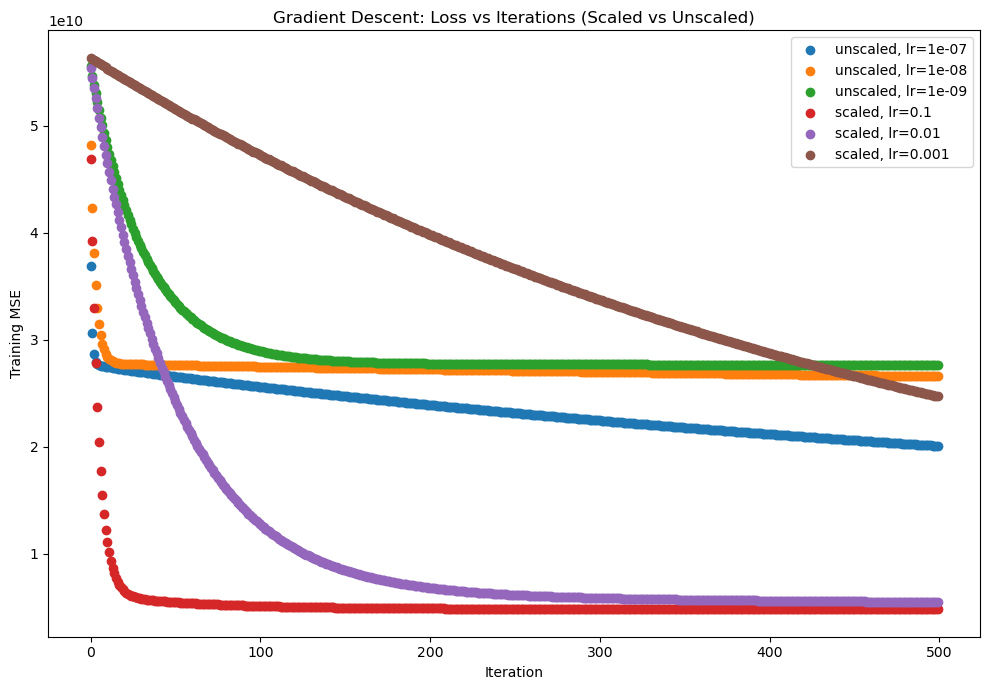

In [27]:
plt.figure(figsize=(10,7))
for label, loss in curves:
    plt.scatter(range(len(loss)), loss, label=label)

plt.xlabel("Iteration")
plt.ylabel("Training MSE")
plt.title("Gradient Descent: Loss vs Iterations (Scaled vs Unscaled)")
plt.yscale("linear")
plt.legend()
plt.tight_layout()
plt.show()

##### Gradient Descent Visualization

In [28]:
gd = GradientDescent()
gd.fit(x_train = scaled_x_train, y_train=y_train, epochs=50, learning_rate=0.1)

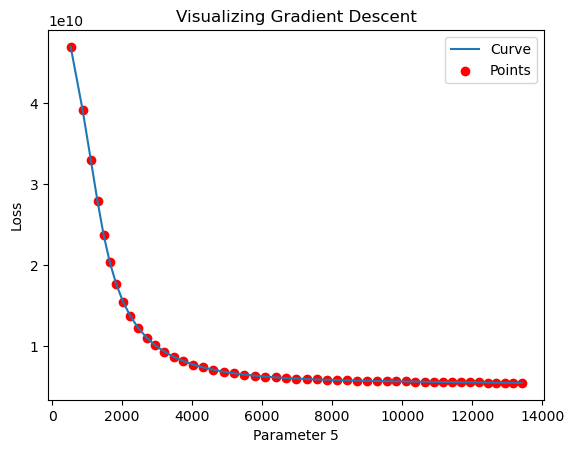

In [29]:
plt.plot(gd.weights, gd.loss_per_iterations, label="Curve")
plt.scatter(gd.weights, gd.loss_per_iterations, label="Points", color = "red")
plt.title("Visualizing Gradient Descent")
plt.xlabel("Parameter 5"); 
plt.ylabel("Loss"); 
plt.legend(); 
plt.show()

##### Plotting the Validation Loss

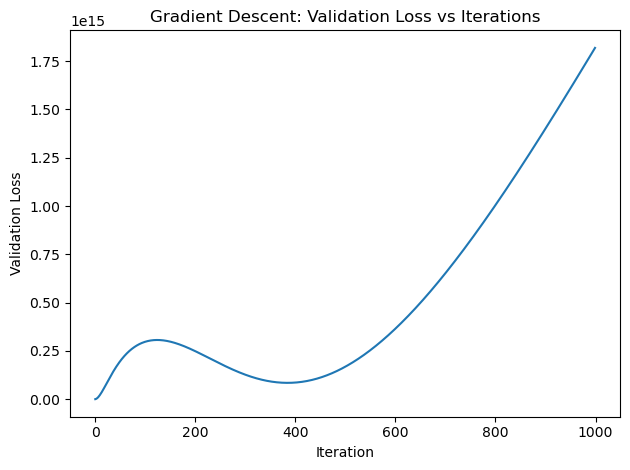

In [30]:
plt.plot(range(len(model_gradient_descent.val_loss)), model_gradient_descent.val_loss)
plt.xlabel("Iteration")
plt.ylabel("Validation Loss")
plt.title("Gradient Descent: Validation Loss vs Iterations")
plt.yscale("linear")
plt.tight_layout()
plt.show()

### (F) Evaluation Metrics

In [31]:
def PerformanceMetrics(y_pred, y_test):
    MAE = np.mean(np.abs(y_pred - y_test))
    MSE = np.mean((y_pred - y_test) ** 2)
    RMSE = np.sqrt(MSE)

    # For R^2 score
    rss = np.sum((y_test - y_pred) ** 2) ## Residual Sum of Squares (RSS)
    tss = np.sum((y_test - np.mean(y_test)) ** 2) ## Total Sum of Squares(TSS)
    R2 = 1 - rss / tss

    print("Mean Squared Error (MSE):", MSE)
    print("Root Mean Squared Error (RMSE):", RMSE)
    print("Mean Absolute Error (MAE):", MAE)
    print("R^2 Score:", R2)

In [32]:
print("Metrics of Linear Regression by Normal Equation: ")
PerformanceMetrics(y_pred = y_pred_normal_equation, y_test=y_test)
print()
print("Metrics of Linear Regression by Gradient Descent: ")
PerformanceMetrics(y_pred = y_pred_gradient_descent, y_test=y_test)
print()
print("Metrics of Linear Regression by Scikit Learn: ")
PerformanceMetrics(y_pred = y_pred_scikit_learn, y_test=y_test)

Metrics of Linear Regression by Normal Equation: 
Mean Squared Error (MSE): 4886020526.855478
Root Mean Squared Error (RMSE): 69900.07529935485
Mean Absolute Error (MAE): 50669.4460909907
R^2 Score: 0.6180349003715606

Metrics of Linear Regression by Gradient Descent: 
Mean Squared Error (MSE): 5149425304.298778
Root Mean Squared Error (RMSE): 71759.49626564262
Mean Absolute Error (MAE): 52254.6248491863
R^2 Score: 0.5974432079081875

Metrics of Linear Regression by Scikit Learn: 
Mean Squared Error (MSE): 4886020526.855477
Root Mean Squared Error (RMSE): 69900.07529935485
Mean Absolute Error (MAE): 50669.44609099066
R^2 Score: 0.6180349003715608
